In [46]:
# calibration with data collected during 2002-2003 in marrakech / Field C2

import sys, os
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
data_dir = os.path.join(os.getcwd(), "C2")
import pcse
cropfile = os.path.join(data_dir, 'C2.crop')
from pcse.fileinput import CABOFileReader
cropdata = CABOFileReader(cropfile)
soilfile = os.path.join(data_dir, 'MO4.soil')
soildata = CABOFileReader(soilfile)
from pcse.util import WOFOST71SiteDataProvider
sitedata = WOFOST71SiteDataProvider(WAV=15, CO2=360)
from pcse.base import ParameterProvider
parameters = ParameterProvider(cropdata=cropdata, soildata=soildata, sitedata=sitedata)
from pcse.fileinput import YAMLAgroManagementReader
agromanagement_file = os.path.join(data_dir, 'C2_calendar.agro')
agromanagement = YAMLAgroManagementReader(agromanagement_file)
from pcse.fileinput import ExcelWeatherDataProvider
wdp = ExcelWeatherDataProvider('Climat_2002-2003.xlsx')
from pcse.models import Wofost71_WLP_FD
wofsim = Wofost71_WLP_FD(parameters, wdp, agromanagement)
wofsim.run_till_terminate()
df_results = pd.DataFrame(wofsim.get_output())
df_results = df_results.set_index("day")
df_results.tail()

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/pcse/fileinput/yaml_agro_loader.py:21: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  r = yaml.load(fp)


,DVS,LAI,TAGP,TWSO,TWLV,TWST,TWRT,TRA,RD,SM,WWLOW,EVW,EVS
day,,,,,,,,,,,,,
2003-05-23,1.836686,0.395993,4698.636137,1999.960323,874.542731,1824.133083,423.617375,0.025687,55.0,0.184890,24.568939,0.0,0.057711
2003-05-24,1.871581,0.285341,4698.636137,1999.960323,874.542731,1824.133083,423.617375,0.015417,55.0,0.183373,24.485541,0.0,0.053175
2003-05-25,1.898840,0.244861,4698.636137,1999.960323,874.542731,1824.133083,423.617375,0.011712,55.0,0.182126,24.416950,0.0,0.051678
2003-05-26,1.921596,0.177659,4698.636137,1999.960323,874.542731,1824.133083,423.617375,0.008427,55.0,0.180974,24.353560,0.0,0.057930
2003-05-27,1.947898,0.148711,4698.636137,1999.960323,874.542731,1824.133083,423.617375,0.006432,55.0,0.179767,24.287204,0.0,0.057320


In [47]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
# for var, ax in zip(["TWSO", "TAGP", "LAI", "SM"], axes.flatten()):
#     ax.plot_date(df_results.index, df_results[var], 'b-')
#     ax.set_title(var)
# fig.autofmt_xdate()

In [48]:
output = wofsim.get_output()
df = pd.DataFrame(output)
df.to_excel("wwh107_C2s.xls")

sortie_C2 = pd.read_excel('/Users/mac/LAI_TAGP_TWSO_2002_2003.xlsx' , sheet_name="C2") 
result = sortie_C2.set_index("day")
# result

In [49]:
ix = (df.LAI)
ix
iy= df.TAGP

In [50]:
# import sklearn.linear_model
# from sklearn.linear_model import LinearRegression
# linreg=LinearRegression()
# linreg.score(ix,iy)

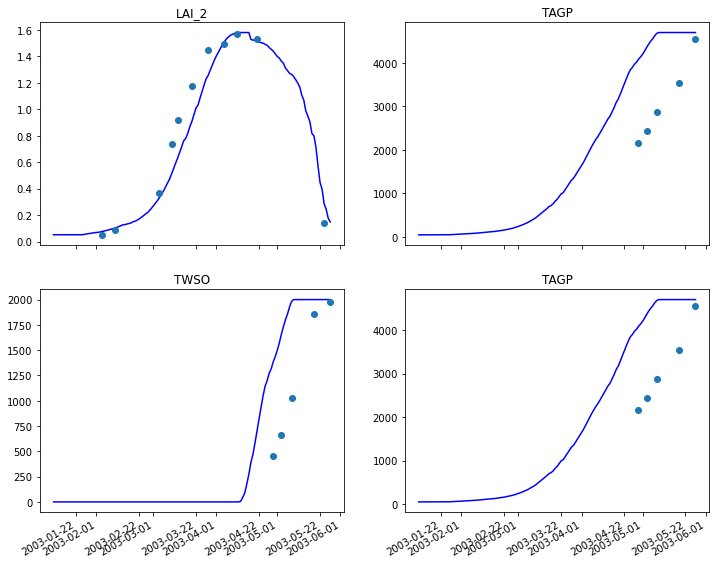

In [51]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10), sharex=True)
for var, ax in zip(["LAI", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["LAI_2", "TAGP", "TWSO", "TAGP"], axes.flatten()):
    ax.plot_date(result.index, result[var])
    ax.set_title(var)
fig.autofmt_xdate()

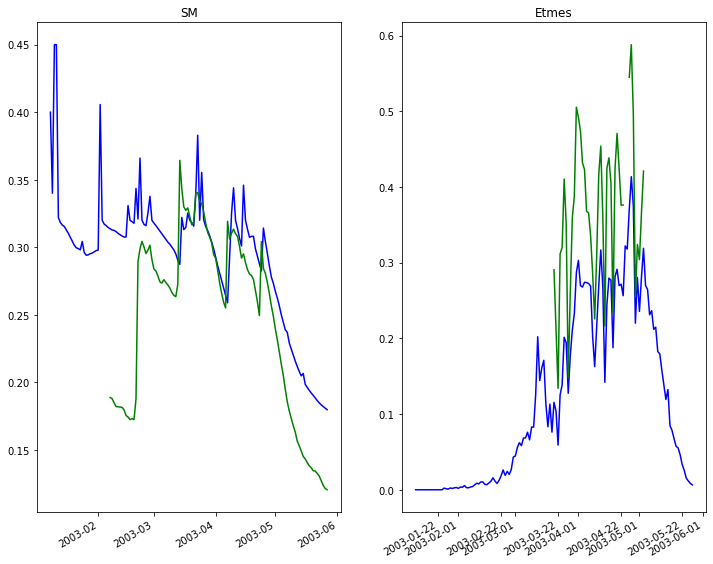

In [52]:
sortie_SM = pd.read_excel('/Users/mac/Soil Moisture Field C1_C2_C3.xlsx', sheet_name="F3-2002-2003_C2")

result_SM = sortie_SM.set_index("day")
                          
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,10))
for var, ax in zip(["SM", "TRA"], axes.flatten()):
    ax.plot_date(df_results.index, df_results[var], 'b-')
    ax.set_title(var)
for var, ax in zip(["SM", "Etmes"], axes.flatten()):
    ax.plot_date(result_SM.index, result_SM[var], 'g-')
    ax.set_title(var)
fig.autofmt_xdate()
